<a href="https://colab.research.google.com/github/ValeRomanA/Proyecto-2_IE0247/blob/main/Proyecto_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importa las funciones necesarias para hacer las operaciones matematicas, graficar las funciones y obtener la transformada de fourier para los espectros.
import numpy as np
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# Requerimeintos para el filtro.
T = 5.0         # Periodo de muestreo
fs = 30.0       # Frecuencia de muestreo de Nyquist, Hz
cutoff = 2      # Frecuencia de corte en el filtro, Hz ,      s
nyq = 0.5 * fs  # Ancho de banda
order = 2       # Función seno representada como una función cuadrática
n = int(T * fs) # numero total de muestras
t = np.linspace(0, T, n, endpoint=False)  # Generar un arreglo de tiempo



In [ ]:
# función seno
sig = np.sin(1.2*2*np.pi*t)
# Agrega rudio mediante dos nuevas funciones a la función original
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Obtiene los coeficientes del filtro
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
y = butter_lowpass_filter(data, cutoff, fs, order)


In [ ]:
# Filtrar la data, trazar ambas señales la original y la filtrada
y = butter_lowpass_filter(data, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'senal con ruido'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'señal filtrada'
            ))
fig.show()


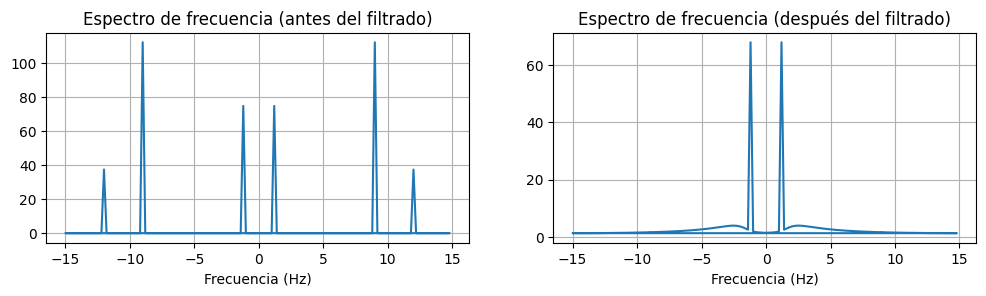

In [ ]:
# Calcular los espectros de frecuencia antes y después del filtrado
freq_data = np.fft.fft(data)
freq_filtered = np.fft.fft(y)

# Calcular las frecuencias correspondientes luego de la transformada de Fourier
freq = np.fft.fftfreq(len(data), 1/fs)

# Crear subplots para mostrar los espectros de frecuencia antes y despues del filtrado
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 3)
plt.plot(freq, np.abs(freq_data))
plt.title('Espectro de frecuencia (antes del filtrado)')
plt.xlabel('Frecuencia (Hz)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(freq, np.abs(freq_filtered))
plt.title('Espectro de frecuencia (después del filtrado)')
plt.xlabel('Frecuencia (Hz)')
plt.grid(True)
